In [1]:
### Needed package, library and dataset
#install.packages("arules")
library(arules)
require(arules)
data("AdultUCI")
Adult <- AdultUCI[,-c(1,3,5,11,12,13)]
Adult = as(Adult,"transactions")
Adult

Loading required package: Matrix

Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write



transactions in sparse format with
 48842 transactions (rows) and
 101 items (columns)

    items                               transactionID
[1] {workclass=State-gov,                            
     education=Bachelors,                            
     marital-status=Never-married,                   
     occupation=Adm-clerical,                        
     relationship=Not-in-family,                     
     race=White,                                     
     sex=Male,                                       
     native-country=United-States,                   
     income=small}                                  1
[2] {workclass=Self-emp-not-inc,                     
     education=Bachelors,                            
     marital-status=Married-civ-spouse,              
     occupation=Exec-managerial,                     
     relationship=Husband,                           
     race=White,                                     
     sex=Male,                                       
     native-country=United-States,                   
     income=small}          

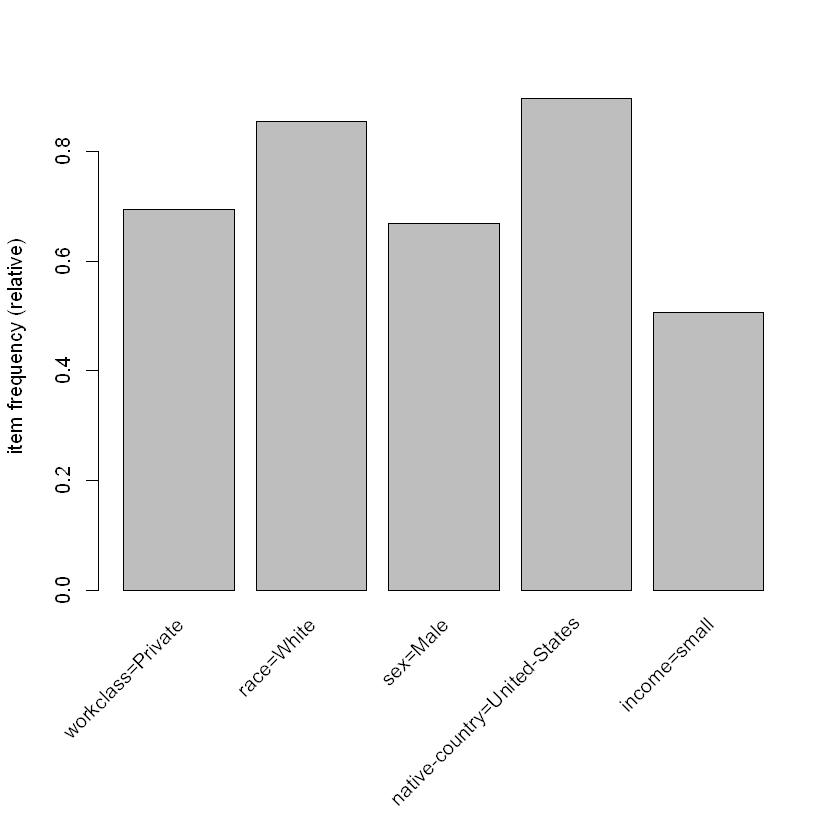

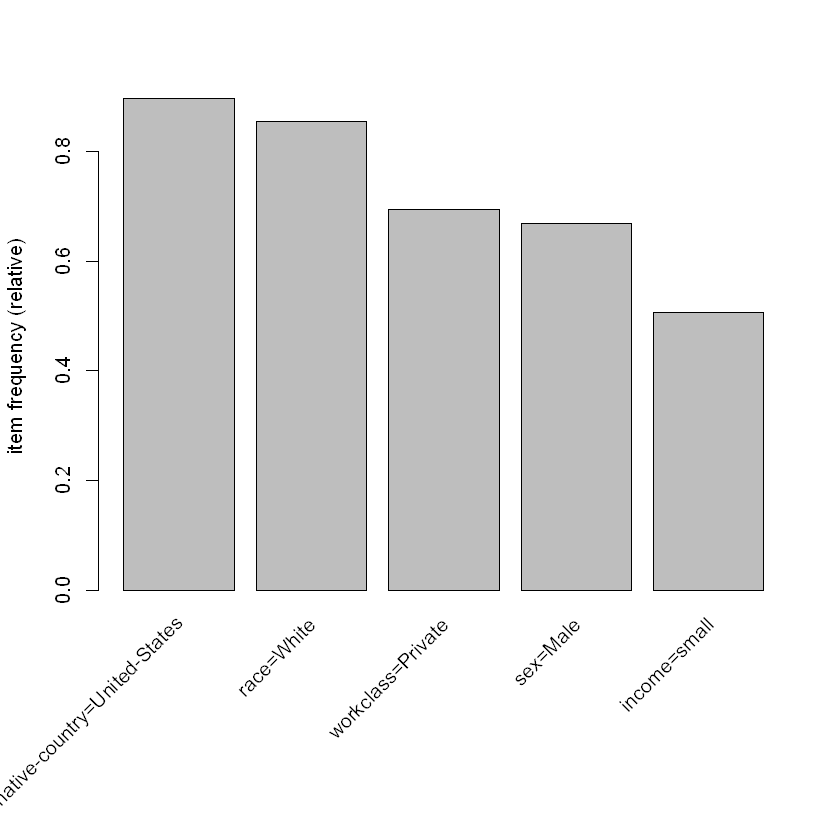

In [2]:
#### Association rules
inspect(Adult[1:5,]) # First 5 rows
itemFrequencyPlot(Adult,support=0.5) # Items having at least support of 0.5
itemFrequencyPlot(Adult,topN=5) # Top 5 support items


In [3]:
### Finding rules

r1 <- apriori(Adult) # Primary search for rules
r1 
r2 <- apriori(Adult, parameter=list(support=0.5, confidence=0.5, minlen=2))
r2 # Customized search for rules
inspect(r2[1:5]) # First 5 rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 4884 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[101 item(s), 48842 transaction(s)] done [0.06s].
sorting and recoding items ... [23 item(s)] done [0.02s].
creating transaction tree ... done [0.08s].
checking subsets of size 1 2 3 4 5 6 done [0.02s].
writing ... [467 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].


set of 467 rules 

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.5      2
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 24421 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[101 item(s), 48842 transaction(s)] done [0.08s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.06s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [16 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 16 rules 

    lhs                               rhs                            support  
[1] {sex=Male}                     => {race=White}                   0.5883256
[2] {race=White}                   => {sex=Male}                     0.5883256
[3] {sex=Male}                     => {native-country=United-States} 0.5983170
[4] {native-country=United-States} => {sex=Male}                     0.5983170
[5] {workclass=Private}            => {race=White}                   0.5942427
    confidence lift     
[1] 0.8800919  1.0292957
[2] 0.6880657  1.0292957
[3] 0.8950383  0.9973412
[4] 0.6667047  0.9973412
[5] 0.8560137  1.0011355


In [7]:
### Sorting rules
inspect(sort(r2, by="support")[1:5]) # Sorting rules by support(Top 5)
inspect(sort(r2, by="confidence")[1:5]) # Sorting rules by confidence(Top 5)
inspect(sort(r2, by="lift")[1:5]) # Sorting rules by lift(Top 5)

   lhs                               rhs                            support  
9  {race=White}                   => {native-country=United-States} 0.7881127
10 {native-country=United-States} => {race=White}                   0.7881127
7  {workclass=Private}            => {native-country=United-States} 0.6171942
8  {native-country=United-States} => {workclass=Private}            0.6171942
3  {sex=Male}                     => {native-country=United-States} 0.5983170
   confidence lift     
9  0.9217231  1.0270761
10 0.8781940  1.0270761
7  0.8890757  0.9906971
8  0.6877396  0.9906971
3  0.8950383  0.9973412
  lhs                               rhs                              support confidence      lift
1 {race=White}                   => {native-country=United-States} 0.7881127  0.9217231 1.0270761
2 {race=White,                                                                                   
   sex=Male}                     => {native-country=United-States} 0.5415421  0.9204803 1.0256

In [8]:
### Sorting rules
inspect(sort(r2, by="support")[1:5]) # Sorting rules by support(Top 5)
inspect(sort(r2, by="confidence")[1:5]) # Sorting rules by confidence(Top 5)
inspect(sort(r2, by="lift")[1:5]) # Sorting rules by lift(Top 5)

   lhs                               rhs                            support  
9  {race=White}                   => {native-country=United-States} 0.7881127
10 {native-country=United-States} => {race=White}                   0.7881127
7  {workclass=Private}            => {native-country=United-States} 0.6171942
8  {native-country=United-States} => {workclass=Private}            0.6171942
3  {sex=Male}                     => {native-country=United-States} 0.5983170
   confidence lift     
9  0.9217231  1.0270761
10 0.8781940  1.0270761
7  0.8890757  0.9906971
8  0.6877396  0.9906971
3  0.8950383  0.9973412
  lhs                               rhs                              support confidence      lift
1 {race=White}                   => {native-country=United-States} 0.7881127  0.9217231 1.0270761
2 {race=White,                                                                                   
   sex=Male}                     => {native-country=United-States} 0.5415421  0.9204803 1.0256

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.4      2
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 19536 

set item appearances ...[2 item(s)] done [0.00s].
set transactions ...[101 item(s), 48842 transaction(s)] done [0.08s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.06s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [10 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].
    lhs                                    rhs          support confidence     lift
[1] {relationship=Husband}              => {sex=Male} 0.4036485  0.9999493 1.495851
[2] {marital-status=Married-civ-spouse,                                            
     relationship=Husband}    

Loading required package: grid
Warning message:
"failed to assign NativeSymbolInfo for lhs since lhs is already defined in the 'lazyeval' namespace"Warning message:
"failed to assign NativeSymbolInfo for rhs since rhs is already defined in the 'lazyeval' namespace"

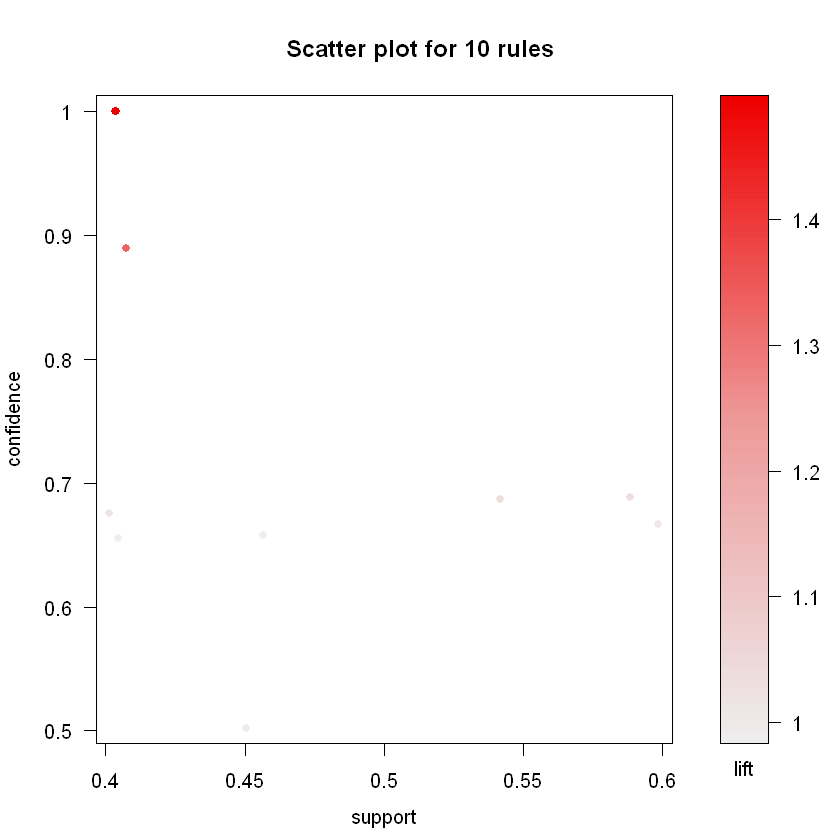

In [4]:
### Limit rules
r3 <- apriori(Adult,parameter = list(minlen=2, support=0.4, confidence=0.5),
                 appearance = list(rhs=c("sex=Male", "income=small"),default="lhs"))
inspect(sort(r3, by="lift")[1:5])

### Plotting rules
#install.packages("arulesViz")
library(arulesViz)
plot(r3)